# Example 4.3

This is an estimation problem of $\mathbb{P}(X > 2)$ where $X \sim \mathcal{N}(0, 1)$.

As noted in the exercise, the estimator is given as
\begin{align}
P(X > 2) \approx \frac{1}{N} \sum_{i=1}^N \mathbf{1}_{\{X_i > 2\}}(X_i)
\end{align}
where $X_i \sim \mathcal{N}(0, 1)$. The implementation is below.

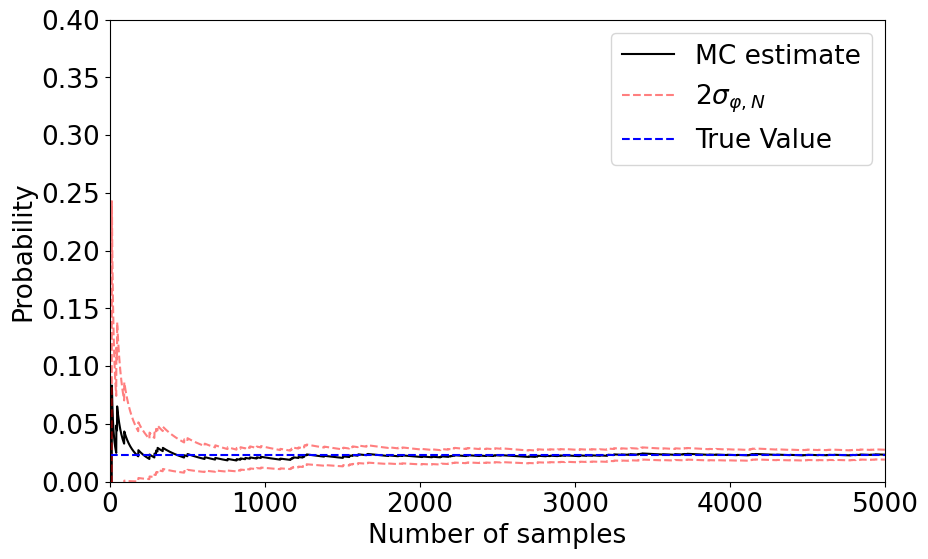

In [1]:
import numpy as np
import matplotlib.pyplot as plt

a = 2

N = 5000

x = np.random.normal(0, 1, N)

def p(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)

xx = np.linspace(-10, 10, 100000)

I_a = np.trapz(p(xx[xx > a]), xx[xx > a]) # True value

Prob_a = np.array([])
var_a = np.array([])
fig = plt.figure(figsize=(10, 6))
k = 0
n_list = np.array([])
x = np.array([])
for n in range(1, N):

    x = np.append(x, np.random.normal(0, 1, 1))
    Prob_a = np.append(Prob_a, np.sum(x > a) / n)
    k = k + 1
    var_a_temp = (1 / n ** 2) * np.sum(((x > a) - Prob_a[k - 1]) ** 2)
    var_a = np.append(var_a, var_a_temp)
    n_list = np.append(n_list, n)

plt.rcParams.update({'font.size': 19})
plt.plot(n_list, Prob_a, 'k-', label='MC estimate')
plt.plot(n_list, Prob_a + 2*np.sqrt(var_a), 'r--', label='2$\sigma_{\\varphi, N}$', alpha=0.5)
plt.plot(n_list, Prob_a - 2*np.sqrt(var_a), 'r--', alpha=0.5)
plt.plot([0, N], [I_a, I_a], 'b--', label='True Value')
plt.legend()
plt.xlabel('Number of samples')
plt.ylabel('Probability')
plt.ylim([0, 0.4])
plt.xlim([0, N])
plt.show()